In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 

In [ ]:
from google.colab import files
uploaded= files.upload()
div=pd.read_csv('NSE-TATAGLOBAL.csv')

Saving NSE-TATAGLOBAL.csv to NSE-TATAGLOBAL (2).csv


In [ ]:
div.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
div.shape

(2035, 8)

In [ ]:
div.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
div.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [ ]:
abi=div.iloc[:,1:2].values
from sklearn.preprocessing import MinMaxScaler
Shy= MinMaxScaler(feature_range = (0, 1))
Sat = Shy.fit_transform(abi)

In [ ]:
a_train= []
b_train=[]
for x in range(100, 2035):
    a_train.append(Sat[x-100:x, 0])
    b_train.append(Sat[x, 0])
a_train, b_train = np.array(a_train), np.array(b_train)

In [ ]:
a_train = np.reshape(a_train, (a_train.shape[0], a_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (a_train.shape[1], 1)))
regressor.add(Dropout(0.5))

In [ ]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.5))

In [ ]:
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.5))

In [ ]:
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(a_train, b_train, epochs = 50, batch_size = 41)

Epoch 1/50
48/48 [==============================] - 14s 80ms/step - loss: 0.0074
Epoch 2/50
48/48 [==============================] - 4s 80ms/step - loss: 0.0033
Epoch 3/50
48/48 [==============================] - 4s 81ms/step - loss: 0.0036
Epoch 4/50
48/48 [==============================] - 4s 80ms/step - loss: 0.0025
Epoch 5/50
48/48 [==============================] - 4s 80ms/step - loss: 0.0025
Epoch 6/50
48/48 [==============================] - 4s 80ms/step - loss: 0.0023
Epoch 7/50
48/48 [==============================] - 4s 81ms/step - loss: 0.0025
Epoch 8/50
48/48 [==============================] - 4s 80ms/step - loss: 0.0025
Epoch 9/50
48/48 [==============================] - 4s 81ms/step - loss: 0.0021
Epoch 10/50
48/48 [==============================] - 4s 80ms/step - loss: 0.0026
Epoch 11/50
48/48 [==============================] - 4s 80ms/step - loss: 0.0018
Epoch 12/50
48/48 [==============================] - 4s 81ms/step - loss: 0.0020
Epoch 13/50
48/48 [=================

In [ ]:
from google.colab import files
uploaded= files.upload()
kal=pd.read_csv('tatatest.csv')
kal.head(5)

Saving tatatest.csv to tatatest.csv


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


In [ ]:
jeam=kal.iloc[:,1:2].values

In [ ]:
mano=pd.concat((div['Open'], kal['Open']), axis = 0)
inputs = mano[len(mano) - len(kal) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = Shy.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = Shy.inverse_transform(predicted_stock_price)

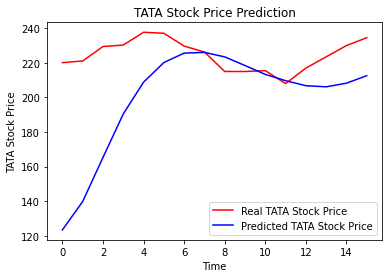

In [ ]:
plt.plot(jeam, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()